<p style="text-align: center;font-size:35px; color:blue;"><b>Machine Learning Using Fraud Dataset</b></p> 


<p style="text-align: center;font-size:35px; color:red;"><b>--------------------------------------------------------------------------</b></p> 


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC


<p style="text-align: center;font-size:35px; color:red;"><b>Load Dataset</b></p> 


In [65]:
data= pd.read_csv("ML_Data.csv")

In [66]:
data.shape

(400, 21)

In [67]:
data.tail()

,transaction_amount,transaction_hour,user_age,account_age_days,num_transactions_24h,num_failed_logins,is_foreign_transaction,is_high_risk_country,has_secure_auth,device_trusted,...,os,location_change,email_verified,phone_verified,transaction_type,merchant_category,ip_risk_score,login_method,previous_fraud_activity,is_fraud
395,267.01,23,40,2572,6,4,0,0,0,0,...,Linux,0,0,0,transfer,travel,0.77,biometric,0,1
396,195.48,22,29,918,2,1,0,0,1,0,...,macOS,0,0,0,purchase,finance,0.49,biometric,0,0
397,56.04,8,37,2449,3,0,0,0,0,0,...,Windows,1,0,0,withdrawal,finance,0.78,password,0,0
398,138.98,22,22,886,2,3,0,0,0,0,...,macOS,1,0,0,transfer,retail,0.58,2FA,0,0
399,140.46,2,54,2753,2,1,0,0,0,0,...,Linux,0,0,0,transfer,digital,0.08,biometric,0,0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_amount       400 non-null    float64
 1   transaction_hour         400 non-null    int64  
 2   user_age                 400 non-null    int64  
 3   account_age_days         400 non-null    int64  
 4   num_transactions_24h     400 non-null    int64  
 5   num_failed_logins        400 non-null    int64  
 6   is_foreign_transaction   400 non-null    int64  
 7   is_high_risk_country     400 non-null    int64  
 8   has_secure_auth          400 non-null    int64  
 9   device_trusted           400 non-null    int64  
 10  browser                  400 non-null    object 
 11  os                       400 non-null    object 
 12  location_change          400 non-null    int64  
 13  email_verified           400 non-null    int64  
 14  phone_verified           4

In [69]:
data.isnull().sum()

transaction_amount         0
transaction_hour           0
user_age                   0
account_age_days           0
num_transactions_24h       0
num_failed_logins          0
is_foreign_transaction     0
is_high_risk_country       0
has_secure_auth            0
device_trusted             0
browser                    0
os                         0
location_change            0
email_verified             0
phone_verified             0
transaction_type           0
merchant_category          0
ip_risk_score              0
login_method               0
previous_fraud_activity    0
is_fraud                   0
dtype: int64

In [70]:
data.describe()

,transaction_amount,transaction_hour,user_age,account_age_days,num_transactions_24h,num_failed_logins,is_foreign_transaction,is_high_risk_country,has_secure_auth,device_trusted,location_change,email_verified,phone_verified,ip_risk_score,previous_fraud_activity,is_fraud
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,96.765375,11.665000,43.302500,1421.362500,1.955000,2.080000,0.105000,0.032500,0.300000,0.192500,0.155000,0.095000,0.215000,0.496400,0.03500,0.520000
std,91.544654,6.890317,15.418018,874.011133,1.364783,1.424314,0.306937,0.177546,0.458831,0.394757,0.362358,0.293582,0.411337,0.288399,0.18401,0.500226
min,0.510000,0.000000,18.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,27.615000,5.000000,29.000000,708.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270000,0.00000,0.000000
50%,71.685000,12.000000,44.000000,1334.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510000,0.00000,1.000000
75%,137.650000,18.000000,56.000000,2111.750000,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.752500,0.00000,1.000000
max,465.700000,23.000000,69.000000,2997.000000,7.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000



<p style="text-align: center;font-size:35px; color:red;"><b>(Yes,No) count</b></p> 


In [71]:
data['is_fraud'].value_counts()

is_fraud
1    208
0    192
Name: count, dtype: int64

<p style="text-align: center;font-size:35px; color:red;"><b>Skewness</b></p> 


***



In [72]:
numeric_cols = data.select_dtypes(include=[np.number])
print(numeric_cols.skew().sort_values(ascending=False))

is_high_risk_country       5.292707
previous_fraud_activity    5.079473
email_verified             2.772888
is_foreign_transaction     2.586749
location_change            1.913763
device_trusted             1.565748
transaction_amount         1.414243
phone_verified             1.392689
has_secure_auth            0.876161
num_transactions_24h       0.581009
account_age_days           0.134238
user_age                  -0.004629
ip_risk_score             -0.047839
transaction_hour          -0.064257
is_fraud                  -0.080366
num_failed_logins         -0.084097
dtype: float64


<p style="text-align: center;font-size:35px; color:red;"><b>Checking Outliers</b></p> 


In [73]:
outlier= {}
for col in numeric_cols.columns:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers = data[(data[col] < lower_bound) & (data[col] > upper_bound)]
    outlier[col] = len(outliers)
outlier


{'transaction_amount': 0,
 'transaction_hour': 0,
 'user_age': 0,
 'account_age_days': 0,
 'num_transactions_24h': 0,
 'num_failed_logins': 0,
 'is_foreign_transaction': 0,
 'is_high_risk_country': 0,
 'has_secure_auth': 0,
 'device_trusted': 0,
 'location_change': 0,
 'email_verified': 0,
 'phone_verified': 0,
 'ip_risk_score': 0,
 'previous_fraud_activity': 0,
 'is_fraud': 0}


<p style="text-align: center;font-size:35px; color:red;"><b>Correlation</b></p> 


In [74]:
correlation = data.select_dtypes(include=[np.number]).corr()
correlation

,transaction_amount,transaction_hour,user_age,account_age_days,num_transactions_24h,num_failed_logins,is_foreign_transaction,is_high_risk_country,has_secure_auth,device_trusted,location_change,email_verified,phone_verified,ip_risk_score,previous_fraud_activity,is_fraud
transaction_amount,1.000000,0.019647,0.145365,0.040009,0.066682,0.008125,-0.013789,0.066146,0.035551,0.005603,0.023161,0.069844,-0.010253,-0.001398,-0.014617,0.310433
transaction_hour,0.019647,1.000000,-0.023508,-0.028211,0.049564,0.010399,-0.053244,0.041701,0.002537,-0.100624,0.017838,0.019489,0.013096,-0.022239,-0.052008,-0.016230
user_age,0.145365,-0.023508,1.000000,0.013591,0.058415,-0.018795,0.088600,-0.042054,-0.087613,0.022528,-0.110695,0.022427,-0.003563,-0.015289,0.043962,0.002951
account_age_days,0.040009,-0.028211,0.013591,1.000000,0.103064,0.011632,0.001259,-0.006068,-0.100460,0.048590,-0.037973,0.006664,0.076739,0.064184,0.019619,-0.081805
num_transactions_24h,0.066682,0.049564,0.058415,0.103064,1.000000,0.025064,0.005325,-0.004292,-0.050429,0.025423,-0.011200,0.098268,-0.045225,-0.133876,-0.013672,-0.035390
num_failed_logins,0.008125,0.010399,-0.018795,0.011632,0.025064,1.000000,0.003669,-0.010307,0.036049,-0.089863,-0.019230,-0.030208,-0.089321,0.040789,0.094479,0.412834
is_foreign_transaction,-0.013789,-0.053244,0.088600,0.001259,0.005325,0.003669,1.000000,-0.016786,0.024915,0.018926,-0.011492,-0.083161,-0.020446,0.026365,0.156643,0.329080
is_high_risk_country,0.066146,0.041701,-0.042054,-0.006068,-0.004292,-0.010307,-0.016786,1.000000,0.003077,0.017790,-0.000584,0.084866,0.075671,0.002291,-0.034905,0.034992
has_secure_auth,0.035551,0.002537,-0.087613,-0.100460,-0.050429,0.036049,0.024915,0.003077,1.000000,0.026290,-0.054267,-0.026048,0.015935,0.007424,0.053432,0.072070
device_trusted,0.005603,-0.100624,0.022528,0.048590,0.025423,-0.089863,0.018926,0.017790,0.026290,1.000000,0.018660,0.079690,0.022303,-0.070067,0.010523,-0.089352


<p style="text-align: center;font-size:35px; color:red;"><b>Correlation heatmap</b></p> 


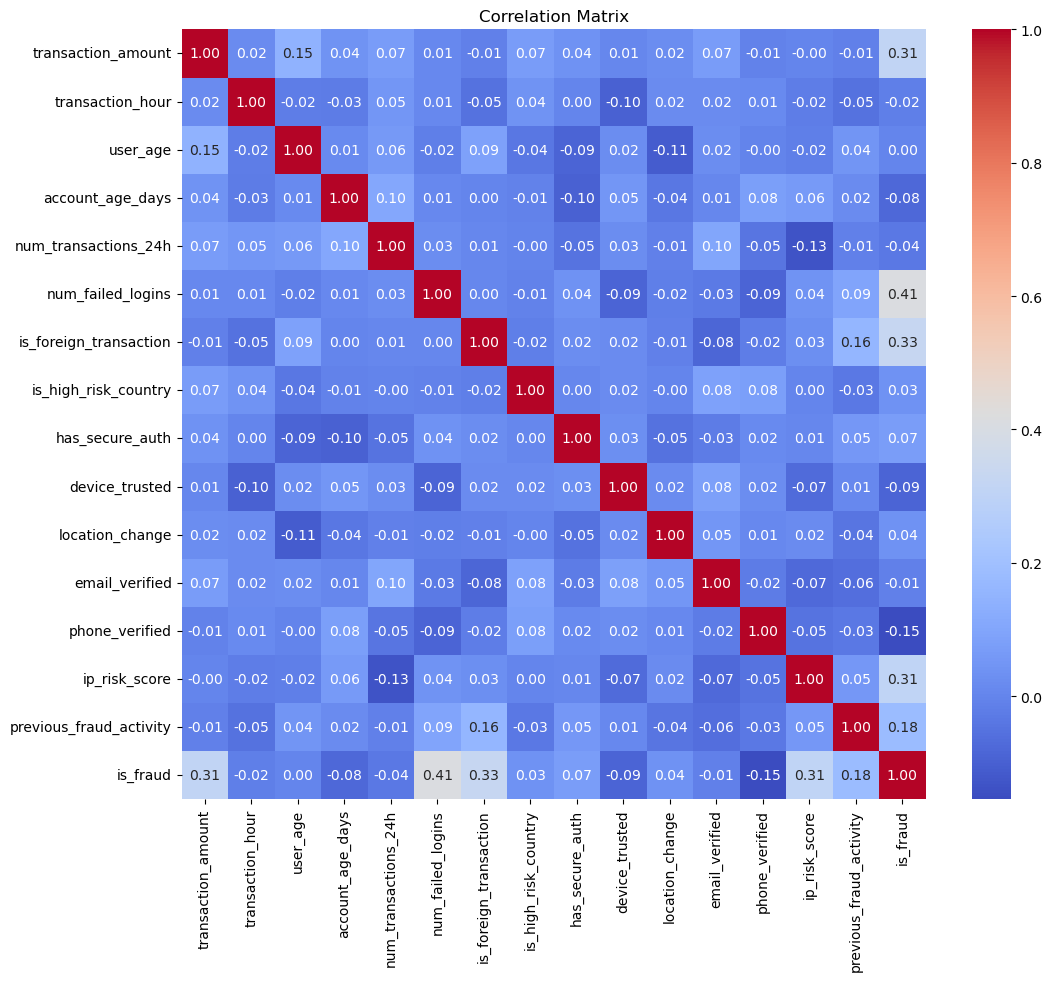

Highly correlated features to drop:
[]


In [75]:
numeric_data=data.select_dtypes(include=[np.number])
correlation_matrix=numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

threshold=0.95
upper=correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(abs(upper[column]) > threshold)]

print("Highly correlated features to drop:")
print(high_corr_features)
data_reduced=data.drop(columns=high_corr_features)
#data['transaction_amount_log'] = np.log1p(data['transaction_amount'])



In [76]:
categorical_cols = [
    'browser', 'os', 'location_change', 'email_verified', 'phone_verified',
    'transaction_type', 'merchant_category'
]

numerical_cols = [
    'transaction_amount', 'transaction_hour', 'user_age', 'account_age_days',
    'num_transactions_24h', 'num_failed_logins', 'ip_risk_score', 'previous_fraud_activity'
]



In [77]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(),numerical_cols ),
        ('encoder', OneHotEncoder(), categorical_cols)
    ]
)

<p style="text-align: center;font-size:35px; color:red;"><b>applying model </b></p> 


In [78]:
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', LogisticRegression(class_weight='balanced')
)
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['transaction_amount',
                                                   'transaction_hour',
                                                   'user_age',
                                                   'account_age_days',
                                                   'num_transactions_24h',
                                                   'num_failed_logins',
                                                   'ip_risk_score',
                                                   'previous_fraud_activity']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['browser', 'os',
                                                   'location_change',
                                                   'email_verified',
                                                   'phone_verified',
                                                   'transaction_type',
                                                   'merchant_category'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [79]:
y = data['is_fraud']
X = data.drop(columns='is_fraud')


<span style="font-size:30px; color:blue;"><b>Training  & Testing</b></span>


In [80]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2 ,random_state=42)

In [81]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['transaction_amount',
                                                   'transaction_hour',
                                                   'user_age',
                                                   'account_age_days',
                                                   'num_transactions_24h',
                                                   'num_failed_logins',
                                                   'ip_risk_score',
                                                   'previous_fraud_activity']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['browser', 'os',
                                                   'location_change',
                                                   'email_verified',
                                                   'phone_verified',
                                                   'transaction_type',
                                                   'merchant_category'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [82]:
#print(X_train.columns)  # Print the column names of X_train


In [83]:
y_pred = pipeline.predict(X_test)
#print(y_pred)

<p style="text-align: center;font-size:35px; color:red;"><b>Report </b></p> 


In [84]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cv_scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean() * 100)

from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')
print("F1-Score:", scores.mean())


Accuracy: 0.7625

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.67      0.75        42
           1       0.70      0.87      0.78        38

    accuracy                           0.76        80
   macro avg       0.78      0.77      0.76        80
weighted avg       0.78      0.76      0.76        80

Cross-Validation Accuracy Scores: [0.75  0.825 0.85  0.825 0.75  0.85  0.8   0.75  0.875 0.65 ]
Mean Accuracy: 79.25000000000001
F1-Score: 0.7738364206685255


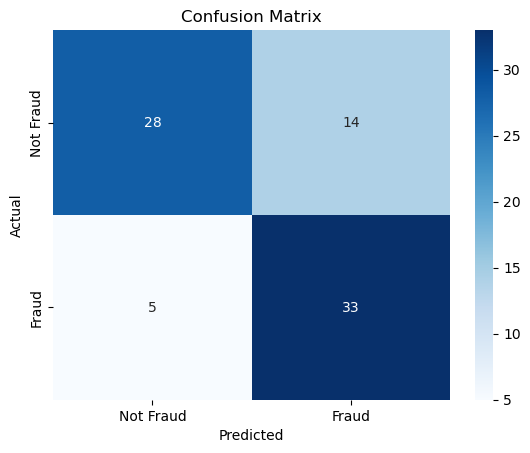

In [85]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<div class="alert alert-block alert-warning">
<span style="font-size:30px; color:blue;"><b>SVM </b></span>

</div>

In [86]:
corr_matrix = data.corr(numeric_only=True)

target_corr = corr_matrix['is_fraud'].drop('is_fraud')

selected_features = target_corr[abs(target_corr) > 0.3].index.tolist()
print("Selected features based on correlation:", selected_features)

X = data[selected_features]
y = data['is_fraud']

X

Selected features based on correlation: ['transaction_amount', 'num_failed_logins', 'is_foreign_transaction', 'ip_risk_score']


,transaction_amount,num_failed_logins,is_foreign_transaction,ip_risk_score
0,46.93,4,0,0.79
1,301.01,0,0,0.02
2,131.67,4,0,0.55
3,91.29,1,1,0.86
4,16.96,3,0,0.47
...,...,...,...,...
395,267.01,4,0,0.77
396,195.48,1,0,0.49
397,56.04,0,0,0.78
398,138.98,3,0,0.58


In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<span style="font-size:30px; color:blue;"><b>Training & Testing </b></span>


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

y_svm_pred = svm.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_svm_pred))
print("Accuracy Score:", accuracy_score(y_test, y_svm_pred))
cv_scores = cross_val_score(svm, X_scaled, y, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:",cv_scores.mean() * 100)



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.93      1.00      0.96        38

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80

Accuracy Score: 0.9625
Cross-Validation Accuracy Scores: [0.95  0.975 0.975 0.95  0.975 0.975 0.95  1.    0.9   0.975]
Mean Accuracy: 96.25


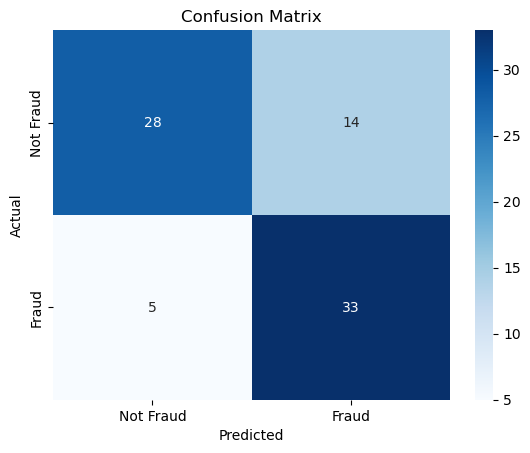

In [89]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


<p style="text-align:center; font-size:35px; color:red; text-shadow: 4px 4px 8px #aaa;">
  <b>ROC Curve</b>
</p>


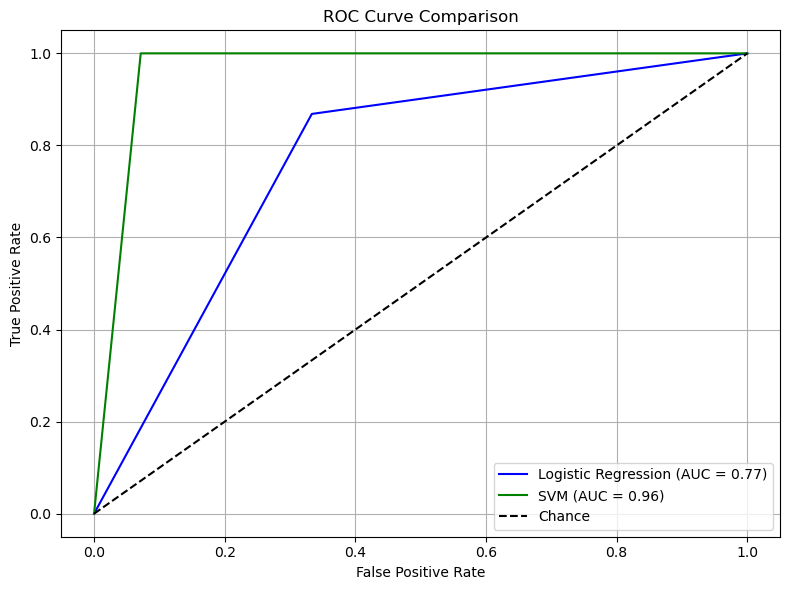

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_svm_pred)
auc_log = roc_auc_score(y_test, y_pred)
auc_svm = roc_auc_score(y_test, y_svm_pred)


# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='blue')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()